**NAME:PRINCE DOBARIYA**
**STUDENT ID:127067205**

In [192]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [193]:
# Loading the Datset 
data = pd.read_csv('final.csv')

**Quick Look at the Dataset** 

In [194]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,439.000000,438.000000,438.000000,438.000000,439.000000,439.000000
mean,1.322727,2.543182,12010.369021,5802.043379,7960.041096,3074.374429,2882.633257,1516.533030
std,0.468052,0.774272,12659.991699,7392.448252,9523.408318,4864.741417,4773.234058,2817.889215
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3119.500000,1541.250000,2149.000000,738.750000,256.500000,407.500000
50%,1.000000,3.000000,8533.000000,3627.000000,4755.500000,1526.000000,813.000000,964.000000
75%,2.000000,3.000000,16934.500000,7176.000000,10675.250000,3543.500000,3935.000000,1803.500000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [195]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Channel           440 non-null    int64  
 1   Region            440 non-null    int64  
 2   Fresh             439 non-null    float64
 3   Milk              438 non-null    float64
 4   Grocery           438 non-null    float64
 5   Frozen            438 non-null    float64
 6   Detergents_Paper  439 non-null    float64
 7   Delicassen        439 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 27.6 KB


In [196]:
# Checking for missing values 
data.isna().sum()

Channel             0
Region              0
Fresh               1
Milk                2
Grocery             2
Frozen              2
Detergents_Paper    1
Delicassen          1
dtype: int64

In [197]:
# Filling missing value(numeric columns) with their respective mean 
SI = SimpleImputer(strategy='mean')
data = SI.fit_transform(data)

In [198]:
# we see that their is lot's of variation in the data and K-means is distance based algorithm So performing feature scaling
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [199]:
# Fitting the data into k-means random model 
kmeans_random = KMeans(n_clusters=5, init='random' , random_state=42)
kmeans_random.fit(data_scaled)

KMeans(init='random', n_clusters=5, random_state=42)

In [200]:
kmeans_random.inertia_

1558.1972449499015

**RANDOM CLUSTERING**

In [201]:
# Running the model for 24 values of K and 1) noting down the inertia 2) and also their silhouette score respectively
model_inertia = []
scores = []
clusters = range(2,26)
for num in clusters:
    model = KMeans(n_clusters=num,s
               init='random')
    model.fit(data_scaled)
    model_inertia.append(model.inertia_)
    labels = model.labels_
    scores.append(silhouette_score(data_scaled, labels))
    

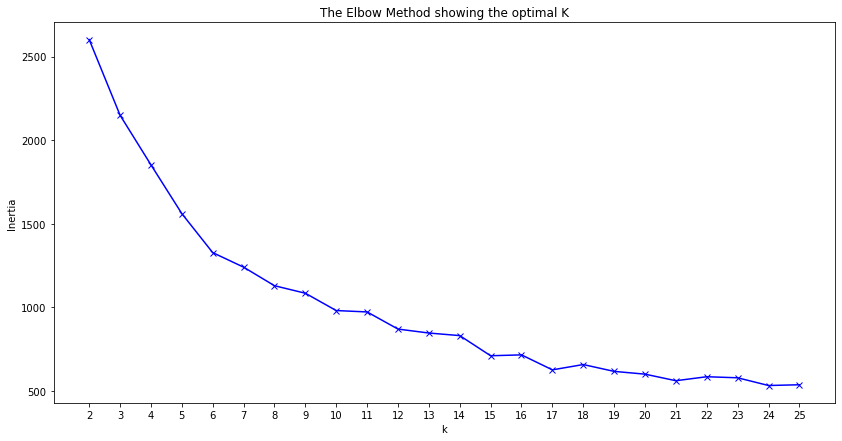

In [202]:
# Plotting Elow Curve
plt.figure(figsize=(14,7))
plt.plot(clusters, model_inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.xticks(range(2,26))
plt.title('The Elbow Method showing the optimal K')
plt.show()

Here we notice a elblow at **K = 6** Because after that their is no significant decrease 

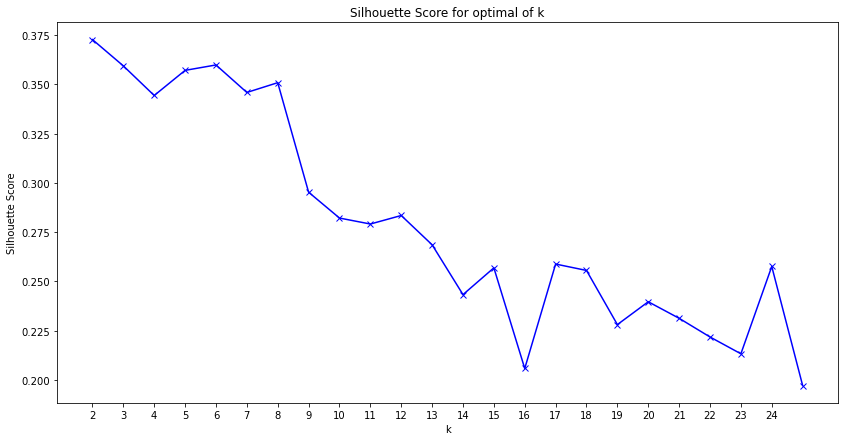

In [203]:
# Plotting Silhouette Scores
plt.figure(figsize=(14,7))
plt.plot(clusters, scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.xticks(range(2,25))
plt.title('Silhouette Score for optimal of k')
plt.show()

Here we looking for values close to 1. So **K = 6** will be best value of K. Values less then K = 6 will leads to underfitting

In [204]:
model = KMeans(n_clusters=6,
               init='random')
y_kmeans = model.fit_predict(data_scaled)

In [205]:
print("Cluster 0:", list(y_kmeans).count(0), " instances")
print("Cluster 1:", list(y_kmeans).count(1), " instances")
print("Cluster 2:", list(y_kmeans).count(2), " instances")
print("Cluster 3:", list(y_kmeans).count(3), " instances")
print("Cluster 4:", list(y_kmeans).count(4), " instances")
print("Cluster 5:", list(y_kmeans).count(5), " instances")

Cluster 0: 164  instances
Cluster 1: 53  instances
Cluster 2: 85  instances
Cluster 3: 4  instances
Cluster 4: 10  instances
Cluster 5: 124  instances


**K-Means++ Clustering**

In [206]:
kmeans_plus = KMeans(n_clusters=5, init='random' , random_state=42)
kmeans_plus.fit(data_scaled)
kmeans_plus.inertia_

1558.1972449499015

In [207]:
model_inertia = []
scores = []
clusters = range(2,26)
for num in clusters:
    model = KMeans(n_clusters=num,
               init='k-means++')
    model.fit(data_scaled)
    model_inertia.append(model.inertia_)
    labels = model.labels_
    scores.append(silhouette_score(data_scaled, labels))

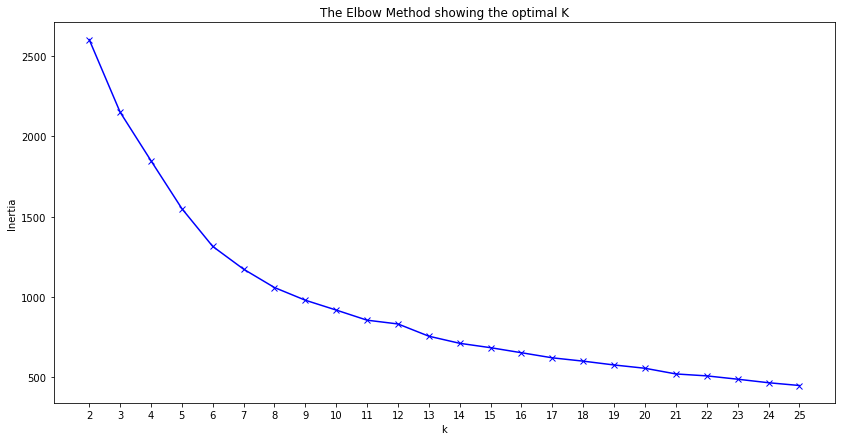

In [208]:
# Plotting Elow Curve
plt.figure(figsize=(14,7))
plt.plot(clusters, model_inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.xticks(range(2,26))
plt.title('The Elbow Method showing the optimal K')
plt.show()

K = 7 will be the best value 

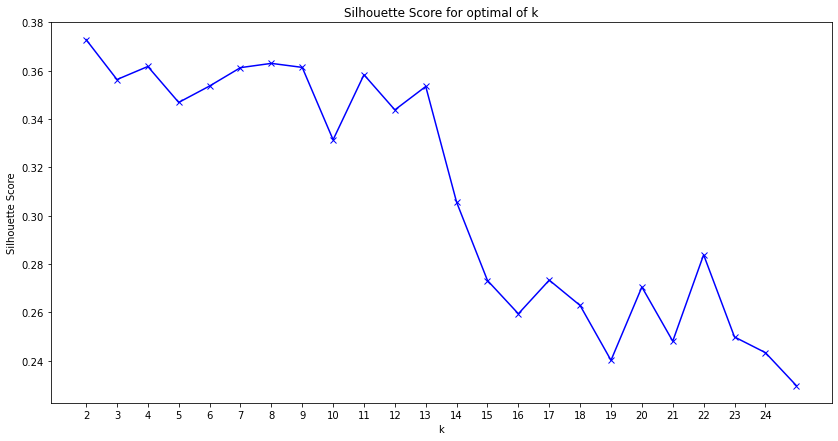

In [209]:
# Plotting Silhouette Scores
plt.figure(figsize=(14,7))
plt.plot(clusters, scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.xticks(range(2,25))
plt.title('Silhouette Score for optimal of k')
plt.show()

Here we looking for values close to 1. So **K = 7** will be best value of K. Values less then K = 7 will leads to underfitting

In [210]:
model = KMeans(n_clusters=7,
               init='random')
y_kmeans = model.fit_predict(data_scaled)

In [213]:
print("Cluster 0:", list(y_kmeans).count(0), " instances")
print("Cluster 1:", list(y_kmeans).count(1), " instances")
print("Cluster 2:", list(y_kmeans).count(2), " instances")
print("Cluster 3:", list(y_kmeans).count(3), " instances")
print("Cluster 4:", list(y_kmeans).count(4), " instances")
print("Cluster 5:", list(y_kmeans).count(5), " instances")
print("Cluster 6:", list(y_kmeans).count(6), " instances")

Cluster 0: 42  instances
Cluster 1: 85  instances
Cluster 2: 11  instances
Cluster 3: 43  instances
Cluster 4: 83  instances
Cluster 5: 173  instances
Cluster 6: 3  instances


In [ ]:
WITH REPORT TO ELOBOW CURVE AND SILHOUETTE SCORE WE GET FOLLOWING RESULTS 

**RANDOM K_MEANS = 6 CLUSTERS** 

**K MEANS ++ = 7 CLUSTERS** 